# CNN - Tensorflow inbuilt image dataset multiclass-classification

In [37]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 22s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [10]:
classes[9]

'truck'

In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    plt.show()

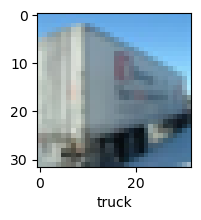

In [15]:
plot_sample(X_train, y_train, 15)

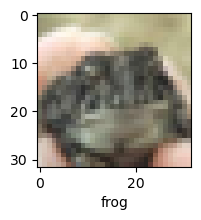

In [16]:
plot_sample(X_train, y_train, 25)

In [17]:
##Normalize data

X_train = X_train/255.0
X_test = X_test/255.0

# Simple ANN



In [18]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid') ])

ann.compile(optimizer="SGD",
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 136s 86ms/step - loss: 1.8190 - accuracy: 0.3511
Epoch 2/5
1563/1563 [==============================] - 141s 90ms/step - loss: 1.6264 - accuracy: 0.4246
Epoch 3/5
1563/1563 [==============================] - 146s 94ms/step - loss: 1.5436 - accuracy: 0.4546
Epoch 4/5
1563/1563 [==============================] - 141s 90ms/step - loss: 1.4852 - accuracy: 0.4767
Epoch 5/5
1563/1563 [==============================] - 142s 91ms/step - loss: 1.4326 - accuracy: 0.4954


In [19]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 6s 19ms/step - loss: 1.4680 - accuracy: 0.4824


[1.4679956436157227, 0.48240000009536743]

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report:\n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 6s 18ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.45      0.54      1000
           1       0.51      0.67      0.58      1000
           2       0.40      0.35      0.37      1000
           3       0.31      0.46      0.37      1000
           4       0.53      0.30      0.39      1000
           5       0.50      0.26      0.34      1000
           6       0.53      0.54      0.54      1000
           7       0.52      0.56      0.54      1000
           8       0.67      0.55      0.60      1000
           9       0.41      0.69      0.51      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.48     10000
weighted avg       0.51      0.48      0.48     10000



From ANN the accuarcy is less(48%), hence ANNis not peforming in image classification data

# CNN

In [24]:
cnn = models.Sequential([
    #CNN
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    layers.MaxPool2D((2,2)),

    #Dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')])


In [25]:
cnn.compile(optimizer="adam",
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"])

In [26]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 36s 22ms/step - loss: 1.4925 - accuracy: 0.4624
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1364 - accuracy: 0.6020
Epoch 3/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.0027 - accuracy: 0.6511
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9178 - accuracy: 0.6792
Epoch 5/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.8583 - accuracy: 0.6998
Epoch 6/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8024 - accuracy: 0.7200
Epoch 7/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7579 - accuracy: 0.7371
Epoch 8/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7178 - accuracy: 0.7512
Epoch 9/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.6854 - accuracy: 0.7611
Epoch 10/10
1563/1563 [==============================] - 38s 25m

In [27]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.8992 - accuracy: 0.7018


[0.8991849422454834, 0.7017999887466431]

In [28]:
y_test = y_test.reshape(-1, )

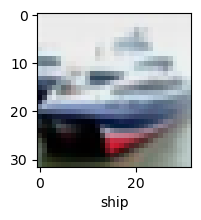

In [29]:
plot_sample(X_test, y_test, 1)

In [30]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 9ms/step


array([[5.23607770e-04, 6.03742010e-05, 2.06821482e-03, 6.31022334e-01,
        1.91556988e-03, 2.63547361e-01, 2.13473826e-03, 1.26543185e-02,
        8.35606083e-02, 2.51290761e-03],
       [3.72386239e-02, 2.57482350e-01, 3.39742019e-06, 2.08292840e-06,
        6.28580281e-08, 3.49964921e-07, 3.44794721e-10, 4.67348445e-06,
        7.04124033e-01, 1.14438229e-03],
       [1.44603467e-02, 1.80792809e-02, 3.81611346e-04, 1.79745280e-03,
        2.79419764e-04, 4.34973015e-04, 3.60800514e-05, 8.24524264e-04,
        9.54498053e-01, 9.20829549e-03],
       [8.80616367e-01, 1.56477880e-04, 6.30997494e-02, 6.11557771e-05,
        1.89076673e-05, 3.17298441e-06, 6.25636358e-06, 1.39840324e-06,
        5.60194403e-02, 1.69761915e-05],
       [2.55570831e-06, 5.70224302e-06, 5.41663021e-02, 1.46919638e-02,
        1.36906132e-01, 1.21239189e-03, 7.92943418e-01, 3.32446530e-06,
        6.78392389e-05, 3.66572976e-07]], dtype=float32)

In [31]:
np.argmax(y_pred[0])

3

In [32]:
y_classes_from_pred = [np.argmax(element) for element in y_pred]
y_classes_from_pred[:5]

[3, 8, 8, 0, 6]

In [33]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [35]:
print("Classification Report:\n", classification_report(y_test, y_classes_from_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.76      0.72      1000
           1       0.81      0.83      0.82      1000
           2       0.54      0.66      0.60      1000
           3       0.60      0.42      0.50      1000
           4       0.72      0.56      0.63      1000
           5       0.66      0.60      0.63      1000
           6       0.75      0.80      0.78      1000
           7       0.70      0.79      0.74      1000
           8       0.77      0.82      0.80      1000
           9       0.79      0.76      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



Here accuracy is good , it's better than ANN